In [6]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development. 

In [10]:
## Read Data for the Fraudulent Email Kaggle Challenge
data = pd.read_csv("H:\My Drive\IRONHACK\WEEK_7_Natural language\Day_1_NLP\lab-natural-language-processing\data\kg_train.csv",encoding='latin-1')

# Reduce the training set to speed up development. 
# Modify for final system
data = data.head(1000)
print(data.shape)
data.fillna("",inplace=True)

(1000, 2)


In [11]:
data.head()

,text,label
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...",1
1,Will do.,0
2,Nora--Cheryl has emailed dozens of memos about...,0
3,Dear Sir=2FMadam=2C I know that this proposal ...,1
4,fyi,0


In [14]:
data.columns

Index(['text', 'label'], dtype='object')

### Let's divide the training and test set into two partitions

In [15]:
# Your codefrom sklearn.model_selection import train_test_split

# Features and target
X = data["text"]
y = data["label"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 80% train / 20% test
    random_state=42,
    stratify=y          # keeps class balance
)

# Check sizes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (800,)
X_test shape: (200,)


## Data Preprocessing

In [16]:
import string
from nltk.corpus import stopwords
print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on']


## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags

In [18]:
# Your code
import re
import html

# 1) Remove inline JavaScript/CSS blocks
SCRIPT_STYLE_RE = re.compile(r"(?is)<(script|style).*?>.*?</\1>")

# 2) Remove HTML comments (do before tags, comments can contain '>')
COMMENT_RE = re.compile(r"(?s)<!--.*?-->")

# 3) Remove remaining HTML tags
TAG_RE = re.compile(r"(?s)<[^>]+>")

- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters
 
- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [19]:
# Your code
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # 1. Remove prefixed 'b' (from byte strings like b'email text')
    text = re.sub(r"^b\s+", "", text)
    text = re.sub(r"^b'", "", text)

    # 2. Convert to lowercase
    text = text.lower()

    # 3. Remove special characters (keep only letters and spaces)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # 4. Remove numbers (already covered above, but kept explicit)
    text = re.sub(r"\d+", " ", text)

    # 5. Remove all single characters
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)

    # 6. Remove single characters from the start
    text = re.sub(r"^[a-zA-Z]\s+", "", text)

    # 7. Substitute multiple spaces with a single space
    text = re.sub(r"\s+", " ", text)

    return text.strip()

## Now let's work on removing stopwords
Remove the stopwords.

In [ ]:
# Your code
#Step 1: Make sure stopwords are available (run once)
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SuzanaSouza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
#Step 2: Create stopwords set (faster lookup)
stop_words = set(stopwords.words("english"))

In [22]:
#Step 3: Remove stopwords (function)
def remove_stopwords(text):
    if not isinstance(text, str):
        return ""
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

In [24]:
data["text_clean"] = data["text"].apply(clean_text)

In [25]:
#Step 4: Apply to your dataset
data["text_nostop"] = data["text_clean"].apply(remove_stopwords)
data[["text_clean", "text_nostop"]].head()

,text_clean,text_nostop
0,dear sir strictly private business proposal am...,dear sir strictly private business proposal mi...
1,will do,
2,nora cheryl has emailed dozens of memos about ...,nora cheryl emailed dozens memos haiti weekend...
3,dear sir fmadam know that this proposal might ...,dear sir fmadam know proposal might surprise e...
4,fyi,fyi


## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [ ]:
# Your code
#Step 1: Download required NLTK resources
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SuzanaSouza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SuzanaSouza\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SuzanaSouza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# Step 2: Import tools
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [28]:
lemmatizer = WordNetLemmatizer()

In [29]:
# Step 3: Lemmatization function
# This function: 
# - breaks sentences into words (tokenization)
# - lemmatizes each word
# - returns clean text ready for vectorization

def lemmatize_text(text):
    if not isinstance(text, str):
        return ""

    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)


In [30]:
# Step 4: Apply lemmatization
data["text_lemma"] = data["text_nostop"].apply(lemmatize_text)

## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

In [31]:
# Your code
#Step 1: Import Bag of Words tools
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [32]:
# Step 2: Separate ham and spam messages
ham_text = data[data["label"] == 0]["text"]
spam_text = data[data["label"] == 1]["text"]

In [33]:
#double-checking label meaning:
data["label"].value_counts()

label
0    558
1    442
Name: count, dtype: int64

In [34]:
# Step 3: Fit Bag of Words on HAM messages
ham_vectorizer = CountVectorizer(
    stop_words="english",
    max_features=1000
)

ham_bow = ham_vectorizer.fit_transform(ham_text)

ham_words = pd.DataFrame(
    ham_bow.sum(axis=0).A1,
    index=ham_vectorizer.get_feature_names_out(),
    columns=["count"]
)

top_ham_words = ham_words.sort_values(by="count", ascending=False).head(10)
top_ham_words

,count
state,137
pm,113
president,98
mr,86
2010,84
obama,84
30,81
percent,77
secretary,75
10,71


In [35]:
# Step 4: Fit Bag of Words on SPAM messages
spam_vectorizer = CountVectorizer(
    stop_words="english",
    max_features=1000
)

spam_bow = spam_vectorizer.fit_transform(spam_text)

spam_words = pd.DataFrame(
    spam_bow.sum(axis=0).A1,
    index=spam_vectorizer.get_feature_names_out(),
    columns=["count"]
)

top_spam_words = spam_words.sort_values(by="count", ascending=False).head(10)
top_spam_words

,count
2e,1857
br,1103
money,979
2c,923
account,835
bank,779
transaction,542
business,511
country,476
fund,474


In [37]:
# Remove br, 2e, 2c
# Emphasize semantic words like money, bank, account
spam_text = data[data["label"] == 1]["text_lemma"]
ham_text = data[data["label"] == 0]["text_lemma"]

In [38]:
spam_vectorizer = CountVectorizer(max_features=1000)

spam_bow = spam_vectorizer.fit_transform(spam_text)

spam_words = pd.DataFrame(
    spam_bow.sum(axis=0).A1,
    index=spam_vectorizer.get_feature_names_out(),
    columns=["count"]
)

spam_words.sort_values("count", ascending=False).head(10)

,count
br,1104
money,987
account,899
bank,801
fund,782
transaction,555
business,514
country,513
mr,490
nbsp,475


Why br and nbsp are STILL appearing? Because Bag of Words is being run on the wrong column. Im still vectorizing raw text, not the version where br, 2e, nbsp were removed.

In [41]:
# Create ONE cleaned column (HTML artifacts removed)
def remove_html_tokens(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"&nbsp;", " ", text)
    text = re.sub(r"<br\s*/?>", " ", text)
    text = re.sub(r"\bbr\b", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

data["text_nohtmltokens"] = data["text"].apply(remove_html_tokens)

In [42]:
data[["text", "text_nohtmltokens"]].head()

,text,text_nohtmltokens
0,"DEAR SIR, STRICTLY A PRIVATE BUSINESS PROPOSAL...","dear sir, strictly a private business proposal..."
1,Will do.,will do.
2,Nora--Cheryl has emailed dozens of memos about...,nora--cheryl has emailed dozens of memos about...
3,Dear Sir=2FMadam=2C I know that this proposal ...,dear sir=2fmadam=2c i know that this proposal ...
4,fyi,fyi


In [44]:
# Run Bag of Words on THIS column (not text)
spam_text = data.loc[data["label"] == 1, "text_nohtmltokens"]

vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X_spam = vectorizer.fit_transform(spam_text)

spam_counts = pd.Series(X_spam.sum(axis=0).A1, index=vectorizer.get_feature_names_out())
spam_counts.sort_values(ascending=False).head(10)

2e             1857
money           979
2c              923
account         835
bank            779
transaction     542
business        511
country         476
fund            474
transfer        422
dtype: int64

In [ ]:
#Run this cell (it overwrites your cleaning function + rebuilds the cleaned column):
def remove_html_tokens(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()

    # remove common HTML/space artifacts
    text = re.sub(r"&nbsp;|&#160;", " ", text)
    text = re.sub(r"<br\s*/?>", " ", text)
    text = re.sub(r"\bbr\b", " ", text)

    # remove quoted-printable / hex artifacts like =2e, =2c, =0a, etc.
    text = re.sub(r"=[0-9a-f]{2}", " ", text)

    # remove standalone 2e/2c style tokens that may remain
    text = re.sub(r"\b[0-9a-f]{2}\b", " ", text)

    # normalize spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

data["text_nohtmltokens"] = data["text"].apply(remove_html_tokens)

In [ ]:
#Re-run Bag of Words on the cleaned column
spam_text = data.loc[data["label"] == 1, "text_nohtmltokens"]

vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X_spam = vectorizer.fit_transform(spam_text)

spam_counts = pd.Series(X_spam.sum(axis=0).A1, index=vectorizer.get_feature_names_out())
spam_counts.sort_values(ascending=False).head(10)

money          988
account        838
bank           777
transaction    544
business       515
country        480
fund           475
transfer       425
mr             395
million        392
dtype: int64

## Extra features

In [51]:
data_train = data.loc[X_train.index].copy()
data_val = data.loc[X_test.index].copy()

In [52]:
data_train.columns

Index(['text', 'label', 'text_clean', 'text_nostop', 'text_lemma',
       'text_nohtmltokens'],
      dtype='object')

In [55]:
data["preprocessed_text"] = data["text_nohtmltokens"]

In [56]:
data_train = data.loc[X_train.index].copy()
data_val = data.loc[X_test.index].copy()

In [57]:
# We add to the original dataframe two additional indicators (money symbols and suspicious words).
money_simbol_list = "|".join(["euro","dollar","pound","€",r"\$"])# # We add to the original dataframe two additional indicators (money symbols and suspicious words).
money_simbol_list = "|".join(["euro","dollar","pound","€",r"\$"])# does it contain scam-related keywords?
suspicious_words = "|".join(["free","cheap","sex","money","account","bank","fund","transfer","transaction","win","deposit","password"])

data_train['money_mark'] = data_train['preprocessed_text'].str.contains(money_simbol_list)*1
data_train['suspicious_words'] = data_train['preprocessed_text'].str.contains(suspicious_words)*1
data_train['text_len'] = data_train['preprocessed_text'].apply(lambda x: len(x)) 

data_val['money_mark'] = data_val['preprocessed_text'].str.contains(money_simbol_list)*1
data_val['suspicious_words'] = data_val['preprocessed_text'].str.contains(suspicious_words)*1
data_val['text_len'] = data_val['preprocessed_text'].apply(lambda x: len(x)) 

data_train.head()
suspicious_words = "|".join(["free","cheap","sex","money","account","bank","fund","transfer","transaction","win","deposit","password"])

data_train['money_mark'] = data_train['preprocessed_text'].str.contains(money_simbol_list)*1
data_train['suspicious_words'] = data_train['preprocessed_text'].str.contains(suspicious_words)*1
data_train['text_len'] = data_train['preprocessed_text'].apply(lambda x: len(x)) 

data_val['money_mark'] = data_val['preprocessed_text'].str.contains(money_simbol_list)*1
data_val['suspicious_words'] = data_val['preprocessed_text'].str.contains(suspicious_words)*1
data_val['text_len'] = data_val['preprocessed_text'].apply(lambda x: len(x)) 

data_train.head()

,text,label,text_clean,text_nostop,text_lemma,text_nohtmltokens,preprocessed_text,money_mark,suspicious_words,text_len
442,Dear=2C Good day hope fine=2Cdear am writting ...,1,dear good day hope fine cdear am writting this...,dear good day hope fine cdear writting mail du...,dear good day hope fine cdear writting mail du...,dear good day hope fine dear am writting this ...,dear good day hope fine dear am writting this ...,1,1,1541
962,FROM MR HENRY KABORETHE CHIEF AUDITOR INCHARGE...,1,from mr henry kaborethe chief auditor incharge...,mr henry kaborethe chief auditor inchargeforei...,mr henry kaborethe chief auditor inchargeforei...,from mr henry kaborethe chief auditor incharge...,from mr henry kaborethe chief auditor incharge...,1,1,3070
971,Will do.,0,will do,,,will do.,will do.,0,0,8
190,FROM THE DESK OF DR.ADAMU ISMALERAUDITING AND...,1,from the desk of dr adamu ismalerauditing and ...,desk dr adamu ismalerauditing accounting manag...,desk dr adamu ismalerauditing accounting manag...,from the desk of dr.adamu ismalerauditing and ...,from the desk of dr.adamu ismalerauditing and ...,1,1,527
551,"Dear Friend, My name is LOI C.ESTRADA,The wife...",1,dear friend my name is loi estrada the wife of...,dear friend name loi estrada wife mr josephest...,dear friend name loi estrada wife mr josephest...,"dear friend, my name is loi c.estrada,the wife...","dear friend, my name is loi c.estrada,the wife...",1,1,2123


## How would work the Bag of Words with Count Vectorizer concept?

In [58]:
# Your code
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "this is spam",
    "this is ham"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

print(vectorizer.get_feature_names_out())
print(X.toarray())

['ham' 'is' 'spam' 'this']
[[0 1 1 1]
 [1 1 0 1]]


## TF-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [59]:
# Your code
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# Step 2: Vectorize the whole dataset
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

X_tfidf = vectorizer.fit_transform(data["preprocessed_text"])

In [61]:
# Step 3: Print the shape of the vectorized dataset
print(X_tfidf.shape)

(1000, 5000)


## And the Train a Classifier?

In [ ]:
# Your code
# 1 - TF-IDF on train/val (correct, no leakage)

# Split
X = data["preprocessed_text"]
y = data["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vectorize
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Val TF-IDF shape:", X_val_tfidf.shape)

Train TF-IDF shape: (800, 5000)
Val TF-IDF shape: (200, 5000)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       112
           1       1.00      0.97      0.98        88

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



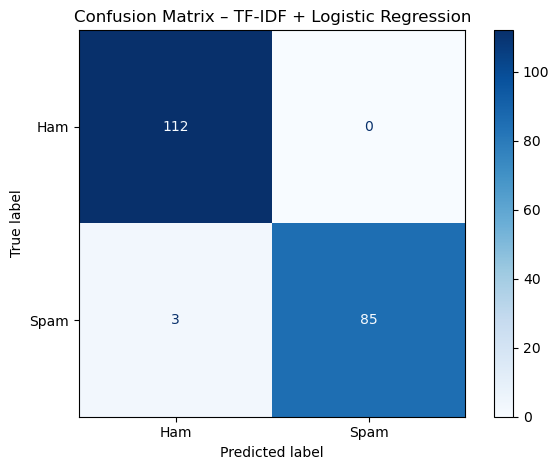

In [69]:
# 2A) Train Logistic Regression (recommended)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

# Train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(X_val_tfidf)

# Report (optional but useful)
print(classification_report(y_val, y_pred))

# Confusion Matrix plot
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred,
    display_labels=["Ham", "Spam"],  # change if your labels aren't 0/1
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix – TF-IDF + Logistic Regression")
plt.tight_layout()
plt.show()

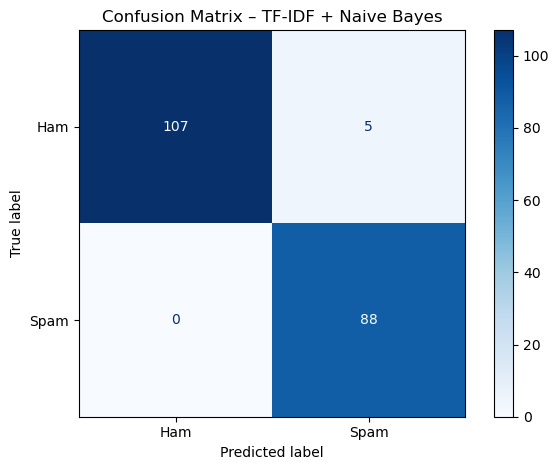

,precision,recall,f1-score,support
0,1.00,0.96,0.98,112.00
1,0.95,1.00,0.97,88.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.97,0.98,0.97,200.00
weighted avg,0.98,0.97,0.98,200.00


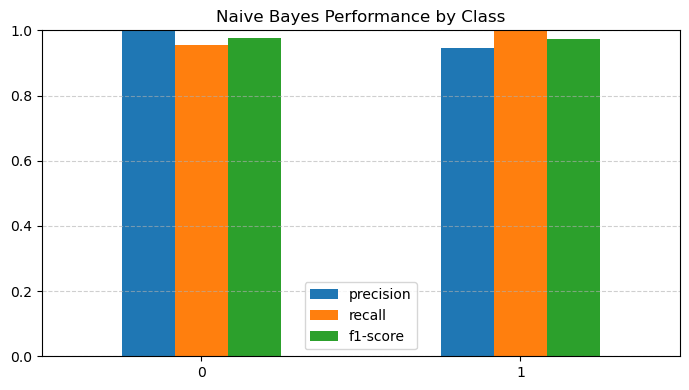

In [70]:
# 2B) Train Naive Bayes (great baseline for text)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Train model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb.predict(X_val_tfidf)

# ===== Confusion Matrix (clean plot) =====
ConfusionMatrixDisplay.from_predictions(
    y_val,
    y_pred_nb,
    display_labels=["Ham", "Spam"],  # adjust if needed
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix – TF-IDF + Naive Bayes")
plt.tight_layout()
plt.show()

# ===== Classification Report (pretty table + bar chart) =====
report = classification_report(y_val, y_pred_nb, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Display as a styled table (Jupyter)
display(df_report.style.format("{:.2f}"))

# Bar plot for precision / recall / F1
df_report.loc[["0", "1"], ["precision", "recall", "f1-score"]].plot(
    kind="bar",
    figsize=(7, 4),
    ylim=(0, 1),
    title="Naive Bayes Performance by Class"
)

plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Extra Task - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

The classifier can not be changed!!! It must be the MultinimialNB with default parameters!

Your task is to **find the most relevant features**.

For example, you can test the following options and check which of them performs better:
- Using "Bag of Words" only
- Using "TF-IDF" only
- Bag of Words + extra flags (money_mark, suspicious_words, text_len)
- TF-IDF + extra flags


You can work with teams of two persons (recommended).

In [ ]:
# Your code
# 1) Train/Validation split
X = data["preprocessed_text"]
y = data["label"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# For extra features aligned by index:
train_idx = X_train.index
val_idx = X_val.index

In [72]:
# 2) Helper to evaluate a model nicely
def eval_nb(Xtr, Xva, ytr, yva, title="Model"):
    nb = MultinomialNB()  # MUST be default
    nb.fit(Xtr, ytr)
    pred = nb.predict(Xva)

    f1 = f1_score(yva, pred, average="macro")
    print(f"{title} | macro-F1: {f1:.4f}")
    print(classification_report(yva, pred))

    ConfusionMatrixDisplay.from_predictions(yva, pred, cmap="Blues", values_format="d")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return f1

BoW only | macro-F1: 0.9798
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.96      1.00      0.98        88

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



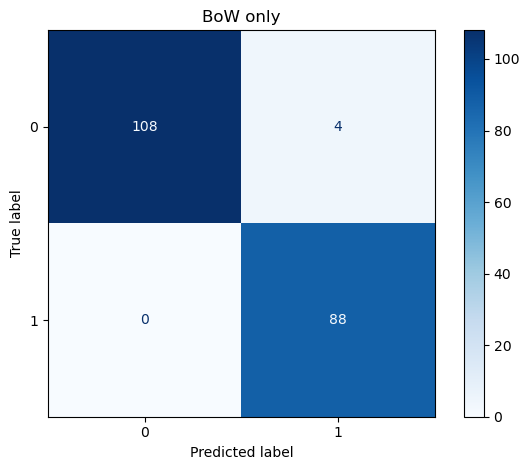

In [74]:
# 3) Build the 4 feature options
# A) Bag of Words only
from sklearn.metrics import f1_score
bow = CountVectorizer(stop_words="english", max_features=5000, ngram_range=(1,2))
Xtr_bow = bow.fit_transform(X_train)
Xva_bow = bow.transform(X_val)

f1_bow = eval_nb(Xtr_bow, Xva_bow, y_train, y_val, "BoW only")

TF-IDF only | macro-F1: 0.9949
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       112
           1       0.99      1.00      0.99        88

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



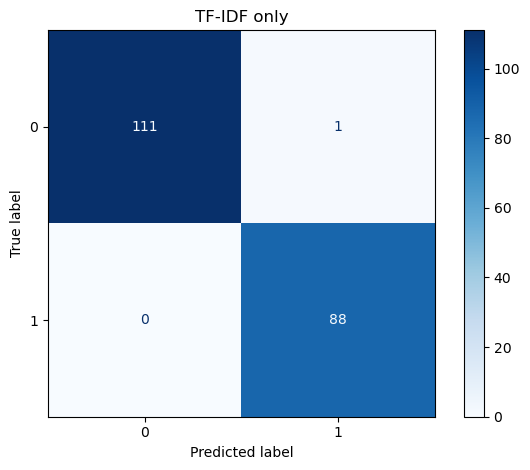

In [78]:
# B) TF-IDF only
tfidf = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1,2))
Xtr_tfidf = tfidf.fit_transform(X_train)
Xva_tfidf = tfidf.transform(X_val)

f1_tfidf = eval_nb(Xtr_tfidf, Xva_tfidf, y_train, y_val, "TF-IDF only")

In [80]:
# 1) Create the extra flags on data
import re

# If preprocessed_text doesn't exist, define it (choose one)
if "preprocessed_text" not in data.columns:
    data["preprocessed_text"] = data["text"]  # or your cleaned column

money_simbol_list = r"\b(euro|dollar|pound)\b|€|\$"
suspicious_words = r"\b(free|cheap|sex|money|account|bank|fund|transfer|transaction|win|deposit|password)\b"

data["money_mark"] = data["preprocessed_text"].str.contains(
    money_simbol_list, case=False, regex=True, na=False
).astype(int)

data["suspicious_words"] = data["preprocessed_text"].str.contains(
    suspicious_words, case=False, regex=True, na=False
).astype(int)

data["text_len"] = data["preprocessed_text"].str.len()

C:\Users\SuzanaSouza\AppData\Local\Temp\ipykernel_15248\2937922603.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data["money_mark"] = data["preprocessed_text"].str.contains(
C:\Users\SuzanaSouza\AppData\Local\Temp\ipykernel_15248\2937922603.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data["suspicious_words"] = data["preprocessed_text"].str.contains(


In [81]:
data[["money_mark", "suspicious_words", "text_len"]].head()

,money_mark,suspicious_words,text_len
0,1,1,2265
1,0,0,8
2,0,0,197
3,1,1,2040
4,0,0,3


In [83]:
# Extra flags matrix
from scipy.sparse import csr_matrix
extra_cols = ["money_mark", "suspicious_words", "text_len"]

Xtr_extra = data.loc[train_idx, extra_cols].fillna(0).values
Xva_extra = data.loc[val_idx, extra_cols].fillna(0).values

# Make sure it's non-negative and sparse:
Xtr_extra = csr_matrix(Xtr_extra)
Xva_extra = csr_matrix(Xva_extra)

BoW + extra flags | macro-F1: 0.9748
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.95      1.00      0.97        88

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



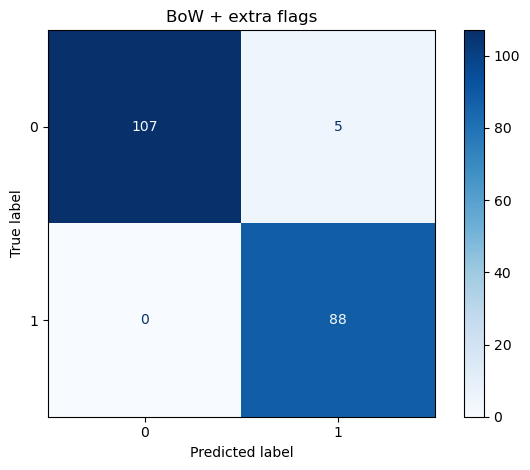

In [85]:
# C) BoW + extra flags
from scipy.sparse import hstack
Xtr_bow_plus = hstack([Xtr_bow, Xtr_extra])
Xva_bow_plus = hstack([Xva_bow, Xva_extra])

f1_bow_plus = eval_nb(Xtr_bow_plus, Xva_bow_plus, y_train, y_val, "BoW + extra flags")

TF-IDF + extra flags | macro-F1: 0.8999
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       112
           1       0.82      0.99      0.90        88

    accuracy                           0.90       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.90      0.90       200



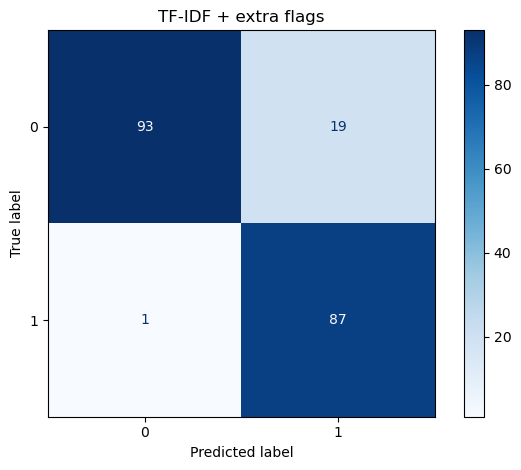

In [86]:
# D) TF-IDF + extra flags
Xtr_tfidf_plus = hstack([Xtr_tfidf, Xtr_extra])
Xva_tfidf_plus = hstack([Xva_tfidf, Xva_extra])

f1_tfidf_plus = eval_nb(Xtr_tfidf_plus, Xva_tfidf_plus, y_train, y_val, "TF-IDF + extra flags")

In [87]:
# Quick comparison table
results = pd.DataFrame({
    "model": ["BoW", "TF-IDF", "BoW + flags", "TF-IDF + flags"],
    "macro_f1": [f1_bow, f1_tfidf, f1_bow_plus, f1_tfidf_plus]
}).sort_values("macro_f1", ascending=False)

results

,model,macro_f1
1,TF-IDF,0.994933
0,BoW,0.979798
2,BoW + flags,0.974772
3,TF-IDF + flags,0.899910


In [89]:
import numpy as np
# 4) “Most relevant features” (what to report)

# Method 1: Top indicative words from Naive Bayes (easy + intuitive)
def top_nb_features(vectorizer, nb_model, top_n=20):
    feat_names = vectorizer.get_feature_names_out()
    log_prob = nb_model.feature_log_prob_  # shape (n_classes, n_features)
    # pick class 1 vs class 0 difference (adjust if your labels differ)
    diff = log_prob[1] - log_prob[0]
    top_spam = np.argsort(diff)[-top_n:][::-1]
    top_ham = np.argsort(diff)[:top_n]

    return (pd.Series(feat_names[top_spam], name="top_spam_words"),
            pd.Series(feat_names[top_ham], name="top_ham_words"))

# Example for TF-IDF only:
nb = MultinomialNB()
nb.fit(Xtr_tfidf, y_train)
top_spam, top_ham = top_nb_features(tfidf, nb, top_n=20)
print("Top SPAM words:\n", top_spam.to_string(index=False))
print("\nTop HAM words:\n", top_ham.to_string(index=False))

Top SPAM words:
       money
    account
       bank
transaction
       fund
   transfer
        kin
        000
        div
    company
      funds
    country
    million
    dollars
        sum
     father
   business
    husband
 assistance
    deposit

Top HAM words:
              fyi
             yes
              ok
       state gov
        tomorrow
             gov
            2009
            talk
              pm
            2010
          cheryl
             pls
      blackberry
             thx
           print
          hrod17
            jake
clintonemail com
    clintonemail
            huma


TF-IDF (top 3000 chi2 features) | macro-F1: 0.9899
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       112
           1       0.98      1.00      0.99        88

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



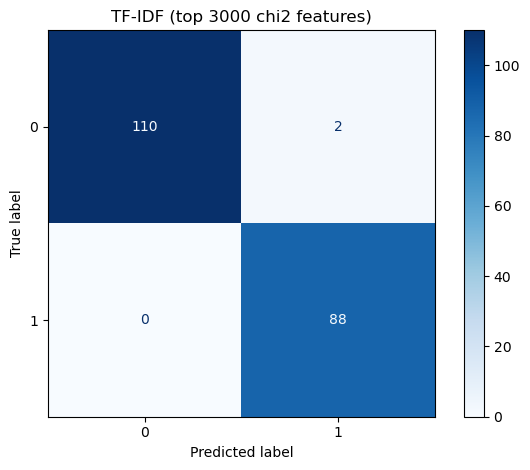

0.9898775179674055

In [90]:
# Method 2: Statistical feature selection (Chi-square)
from sklearn.feature_selection import chi2

# Use BoW or TF-IDF matrix (training only!)
Xtr = Xtr_tfidf   # or Xtr_bow
vec = tfidf       # or bow

chi2_scores, pvals = chi2(Xtr, y_train)
top_k = 3000  # you can try 1000, 2000, 3000, 5000
best_idx = np.argsort(chi2_scores)[-top_k:]

# Reduce matrices to top_k features
Xtr_sel = Xtr[:, best_idx]
Xva_sel = Xva_tfidf[:, best_idx]

eval_nb(Xtr_sel, Xva_sel, y_train, y_val, f"TF-IDF (top {top_k} chi2 features)")